In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")


In [2]:
def fetch_results(history_src, num_fold):
    all_train_losses = []
    all_valid_losses = []
    all_max_f1 = []
    for fold in range(1, num_fold + 1):
        fold_src = os.path.join(history_src, "history-0{}.pickle".format(fold))
        history_dict = pd.read_pickle(fold_src)
        valid_f1 = history_dict['Valid F1']
        max_f1 = np.max(valid_f1)
        argmax_f1 = np.argmax(valid_f1)
        train_loss = history_dict['Train Loss']
        valid_loss = history_dict['Valid Loss']
        best_train_loss = train_loss[argmax_f1]
        best_valid_loss = valid_loss[argmax_f1]
        all_train_losses.append(train_loss)
        all_valid_losses.append(valid_loss)
        all_max_f1.append(max_f1)
    plt.figure(figsize=(10, 6))
    for fold in range(num_fold):
        sns.lineplot(x=range(len(all_train_losses[fold])), y=all_train_losses[fold], label=f'Fold {fold+1} Train Loss')
        sns.lineplot(x=range(len(all_valid_losses[fold])), y=all_valid_losses[fold], label=f'Fold {fold+1} Valid Loss')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return all_max_f1

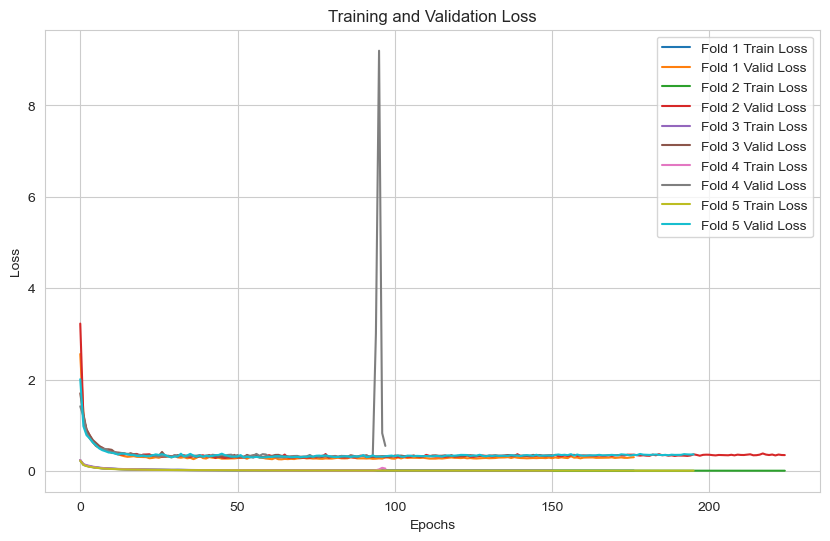

[0.9253775378247159, 0.9182446107102823, 0.9152657190640173, 0.9142560931582325, 0.9169982976013361]
0.9180284516717169


In [3]:
max_f1 = fetch_results(r"C:\Users\Kevin\PycharmProjects\wsi_analysis\kevin\skin_morphometric_analysis\deeplab_pytorch\model\DeepLabV3+_BT_pretrained_resnet50",5)
print(max_f1)
print(np.mean(max_f1))

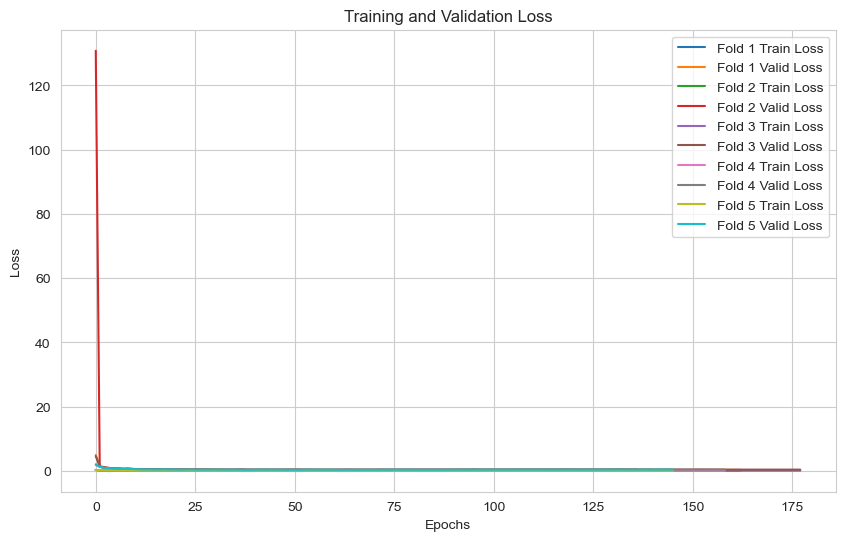

[0.9282280098325987, 0.9189321883011248, 0.9182288128668824, 0.9202629529350679, 0.9176431614028844]
0.9206590250677117


In [4]:
max_f1 = fetch_results(r"C:\Users\Kevin\PycharmProjects\wsi_analysis\kevin\skin_morphometric_analysis\deeplab_pytorch\model\DeepLabV3+_baseline_resnet50",5)
print(max_f1)
print(np.mean(max_f1))